In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.loadtxt('./gmm_dataset.csv',delimiter=',')

In [12]:
class Model:
  def __init__(self,X,K):
    self.n_clusters = K
    self.X = X
    self.n , self.d = X.shape
    self.pi = np.full(shape=self.n_clusters, fill_value=1 / self.n_clusters)
    random_row = np.random.randint(low=0, high=self.n, size=self.n_clusters)
    self.mu = np.array([X[row_index, :] for row_index in random_row])
    self.s = np.array([np.random.random(self.d) for _ in range(self.n_clusters)])
    self.r = np.zeros((self.n, self.n_clusters))
  def solv(self,maxpass = 500,tol = 1e-5):
    loss = []
    for iter in range(maxpass):
      for cluster in range(self.n_clusters):
        det = np.prod(self.s[cluster]) + 1e-8
        exp = (self.X - self.mu[cluster]) * (self.X - self.mu[cluster]) * (1 / (self.s[cluster]))
        exp = np.exp(-0.5 * np.sum(exp, axis=1)) + 1e-8
        self.r[:, cluster] = (self.pi[cluster] / np.sqrt(det)) * exp
      r_i = np.sum(self.r, axis=1)
      loss.append(- np.sum(np.log(r_i)))
      r_i = r_i.reshape((-1, 1))
      self.r /= r_i
      if iter > 0 and abs(loss[iter]-loss[iter-1]) <= tol*abs(loss[iter]):
        #print('when k equals to %i, loop quit at iteration %i'%(self.n_clusters,iter))
        break
      for cluster in range(self.n_clusters):
        r_k = self.r[:, cluster].sum()
        self.pi[cluster] = r_k / self.n
        self.mu[cluster] = np.sum(self.X * self.r[:, cluster].reshape((-1, 1)), axis=0) / r_k
        self.s[cluster] = np.sum(self.X * self.X * self.r[:, cluster].reshape((-1, 1)), axis=0) / r_k - self.mu[cluster] * self.mu[cluster].T
    return loss
  def cal_density(self, X_te):
    r = np.zeros((X_te.shape[0], self.n_clusters))
    for cluster in range(self.n_clusters):
      det = np.prod(self.s[cluster]) + 1e-8
      exp = (X_te - self.mu[cluster]+1e-8) * (X_te - self.mu[cluster]+1e-8) * (1 / (self.s[cluster]+1e-8))
      exp = np.exp(-0.5 * np.sum(exp, axis=1))
      r[:, cluster] = (self.pi[cluster] / np.sqrt(det)) * exp
    r_i = np.sum(r, axis=1)
    return r_i


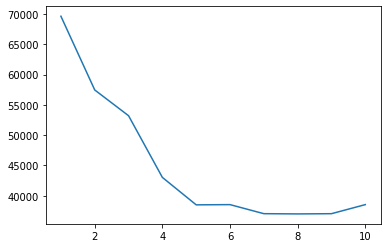

In [13]:
li = []
for i in range(10):
 m = Model(X,i+1)
 loss = m.solv()
 li.append(loss[-1])
plt.plot([i+1 for i in range(10)],li)

In [23]:
#pick k=5 as the best
m = Model(X,5)
loss = m.solv()
m.pi.sort()
print(m.pi)
print('\n')
print(m.mu)
print('\n')
print(m.s)

[0.07138138 0.09253874 0.1940479  0.30258223 0.33944975]


[[-5.91368961e-01 -3.29607743e-01 -6.78701852e-01 -1.37134714e+00
   3.44925836e-01 -3.71184687e-01 -1.39558187e+00  4.26560000e-01
  -8.57279988e-01  9.98137431e-02  6.45207418e-01  2.09256301e-01
   1.02490468e+00 -1.09987981e+00  4.03667811e-01 -5.71873991e-01
  -6.61981903e-01 -4.49637237e-01 -2.84701744e-01 -1.67545938e-03]
 [ 1.71131168e+00  4.50083048e-01  9.64607939e-01  2.37332335e+00
   1.86409765e+00 -9.80310454e-01  8.87227243e-01 -1.73114144e-01
  -1.01042920e-01  3.43165489e-01 -2.04877695e-03  1.39648593e+00
   7.67538386e-01  1.08122051e-01  4.32477296e-01  3.53783788e-01
   1.44048341e+00 -1.98740723e-01  3.19922316e-01 -8.86801171e-01]
 [-2.50302670e+00  5.79802132e-01  9.02132586e-01 -6.74749705e-01
   2.27939330e+00 -1.43385415e+00  6.32841356e-02 -1.93841925e-01
   1.48033830e+00  1.45193726e+00  1.27800802e-01  4.22422233e-01
  -8.20630634e-01 -1.95683662e+00 -2.88911000e-01  1.77712841e-01
   1.20872681e+

In [7]:
class Model:
  def __init__(self,X,K):
    self.n_clusters = K
    self.X = X
    self.n , self.d = X.shape
    self.pi = np.full(shape=self.n_clusters, fill_value=1 / self.n_clusters)
    random_row = np.random.randint(low=0, high=self.n, size=self.n_clusters)
    self.mu = np.array([X[row_index, :] for row_index in random_row])
    self.s = np.array([np.random.random(self.d) for _ in range(self.n_clusters)])
    self.r = np.zeros((self.n, self.n_clusters))
  def solv(self,maxpass = 500,tol = 1e-5):
    loss = []
    for iter in range(maxpass):
      for cluster in range(self.n_clusters):
        det = np.prod(self.s[cluster]) + 1e-8
        exp = (self.X - self.mu[cluster]+1e-8) * (self.X - self.mu[cluster]+1e-8) * (1 / (self.s[cluster]+1e-8))
        exp = np.exp(-0.5 * np.sum(exp, axis=1)) + 1e-8
        self.r[:, cluster] = (self.pi[cluster] / np.sqrt(det)) * exp
      r_i = np.sum(self.r, axis=1)
      loss.append(- np.sum(np.log(r_i)))
      r_i = r_i.reshape((-1, 1))
      self.r /= r_i
      if iter > 0 and abs(loss[iter]-loss[iter-1]) <= tol*abs(loss[iter]):
        #print('when k equals to %i, loop quit at iteration %i'%(self.n_clusters,iter))
        break
      for cluster in range(self.n_clusters):
        r_k = self.r[:, cluster].sum()
        self.pi[cluster] = r_k / self.n
        self.mu[cluster] = np.sum(self.X * self.r[:, cluster].reshape((-1, 1)), axis=0) / r_k
        self.s[cluster] = np.sum(self.X * self.X * self.r[:, cluster].reshape((-1, 1)), axis=0) / r_k - self.mu[cluster] * self.mu[cluster].T
    return loss
  def cal_density(self, X_te):
    r = np.zeros((X_te.shape[0], self.n_clusters))
    for cluster in range(self.n_clusters):
      det = np.prod(self.s[cluster]) + 1e-8
      exp = (X_te - self.mu[cluster]+1e-8) * (X_te - self.mu[cluster]+1e-8) * (1 / (self.s[cluster]+1e-8))
      exp = np.exp(-0.5 * np.sum(exp, axis=1))
      r[:, cluster] = (self.pi[cluster] / np.sqrt(det)) * exp
    r_i = np.sum(r, axis=1)
    return r_i

In [5]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_tr = []
x_te = []
for i in range(x_train.shape[0]):
  x_tr.append(x_train[i].reshape(-1)/255)
x_tr = np.array(x_tr)
#x_tr += np.random.normal(0, 1, x_tr.shape)
for i in range(x_test.shape[0]):
  x_te.append(x_test[i].reshape(-1)/255)
x_te = np.array(x_te)
#x_te += np.random.normal(0, 1, x_te.shape)

11501568/11490434 [==============================] - 0s 0us/step


In [6]:
X_0 = []
X_1 = []
X_2 = []
X_3 = []
X_4 = []
X_5 = []
X_6 = []
X_7 = []
X_8 = []
X_9 = []
for j in range(y_train.shape[0]):
  if y_train[j] == 0: X_0.append(x_tr[j])
  if y_train[j] == 1: X_1.append(x_tr[j])
  if y_train[j] == 2: X_2.append(x_tr[j])
  if y_train[j] == 3: X_3.append(x_tr[j])
  if y_train[j] == 4: X_4.append(x_tr[j])
  if y_train[j] == 5: X_5.append(x_tr[j])
  if y_train[j] == 6: X_6.append(x_tr[j])
  if y_train[j] == 7: X_7.append(x_tr[j])
  if y_train[j] == 8: X_8.append(x_tr[j])
  if y_train[j] == 9: X_9.append(x_tr[j])
X_0 = np.array(X_0)
X_1 = np.array(X_1)
X_2 = np.array(X_2)
X_3 = np.array(X_3)
X_4 = np.array(X_4)
X_5 = np.array(X_5)
X_6 = np.array(X_6)
X_7 = np.array(X_7)
X_8 = np.array(X_8)
X_9 = np.array(X_9)

In [7]:
m0 = Model(X_0,5)
m0.solv()
m1 = Model(X_1,5)
m1.solv()
m2 = Model(X_2,5)
m2.solv()
m3 = Model(X_3,5)
m3.solv()
m4 = Model(X_4,5)
m4.solv()
m5 = Model(X_5,5)
m5.solv()
m6 = Model(X_6,5)
m6.solv()
m7 = Model(X_7,5)
m7.solv()
m8 = Model(X_8,5)
m8.solv()
m9 = Model(X_9,5)
m9.solv()
models = [m0,m1,m2,m3,m4,m5,m6,m7,m8,m9]
pr0 = X_0.shape[0]/y_train.shape[0]
pr1 = X_1.shape[0]/y_train.shape[0]
pr2 = X_2.shape[0]/y_train.shape[0]
pr3 = X_3.shape[0]/y_train.shape[0]
pr4 = X_4.shape[0]/y_train.shape[0]
pr5 = X_5.shape[0]/y_train.shape[0]
pr6 = X_6.shape[0]/y_train.shape[0]
pr7 = X_7.shape[0]/y_train.shape[0]
pr8 = X_8.shape[0]/y_train.shape[0]
pr9 = X_9.shape[0]/y_train.shape[0]
prs = [pr0,pr1,pr2,pr3,pr4,pr5,pr6,pr7,pr8,pr9]

In [8]:
result = []
for i in range(10):
  p = models[i].cal_density(x_te)
  result.append(p * prs[i])
pred = np.argmax(result, axis=0)
error = 0
n = len(x_te)
for i in range(n):
  if y_test[i] != pred[i]:
    error += 1
print(error/len(y_test)*100)

18.98


In [ ]:
#############################Exercise 2a#######################################
from __future__ import print_function
import argparse
import torch
import torch.utils.data
from torch import nn, optim
from torchvision import datasets, transforms
from torchvision.utils import save_image
from IPython.display import Image, display
import matplotlib.pyplot as plt
import os
import torch.nn.functional as F

if not os.path.exists('results'):
    os.mkdir('results')

batch_size = 100
latent_size = 20

cuda = torch.cuda.is_available()
device = torch.device("cuda" if cuda else "cpu")

kwargs = {'num_workers': 1, 'pin_memory': True} if cuda else {}
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                   transform=transforms.ToTensor()),
    batch_size=batch_size, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, transform=transforms.ToTensor()),
    batch_size=batch_size, shuffle=True, **kwargs)

100%|██████████| 100/100 [00:01<00:00, 65.78it/s]

Epoch #1


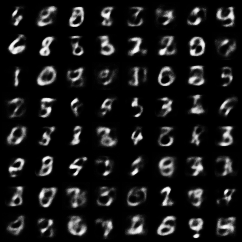

100%|██████████| 100/100 [00:01<00:00, 65.49it/s]

Epoch #2


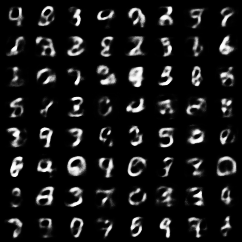

100%|██████████| 100/100 [00:01<00:00, 54.99it/s]

Epoch #3


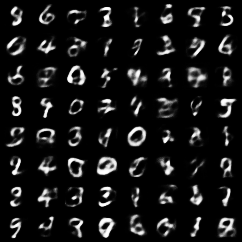

100%|██████████| 100/100 [00:01<00:00, 62.43it/s]

Epoch #4


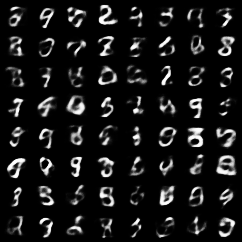

100%|██████████| 100/100 [00:01<00:00, 68.42it/s]

Epoch #5


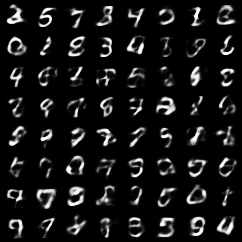

100%|██████████| 100/100 [00:01<00:00, 64.79it/s]

Epoch #6


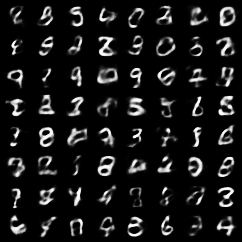

100%|██████████| 100/100 [00:01<00:00, 61.41it/s]

Epoch #7


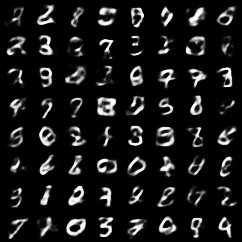

100%|██████████| 100/100 [00:01<00:00, 65.04it/s]

Epoch #8


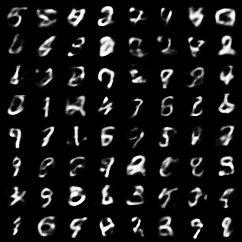

100%|██████████| 100/100 [00:01<00:00, 64.93it/s]

Epoch #9


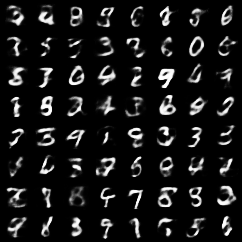

100%|██████████| 100/100 [00:01<00:00, 64.21it/s]

Epoch #10


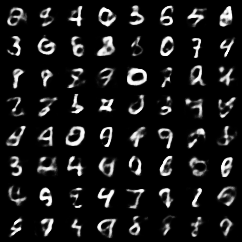

100%|██████████| 100/100 [00:01<00:00, 64.36it/s]

Epoch #11


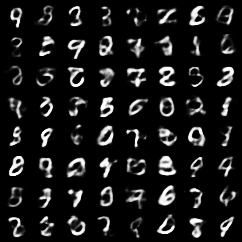

100%|██████████| 100/100 [00:01<00:00, 64.02it/s]

Epoch #12


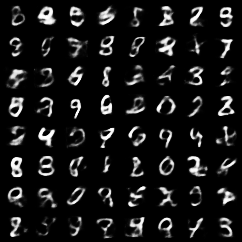

100%|██████████| 100/100 [00:01<00:00, 64.54it/s]

Epoch #13


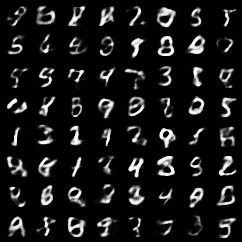

100%|██████████| 100/100 [00:01<00:00, 64.53it/s]

Epoch #14


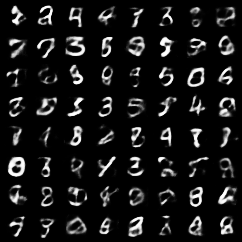

100%|██████████| 100/100 [00:01<00:00, 60.58it/s]

Epoch #15


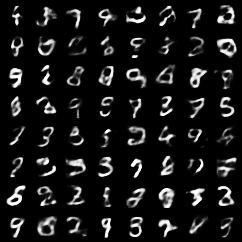

100%|██████████| 100/100 [00:01<00:00, 60.86it/s]

Epoch #16


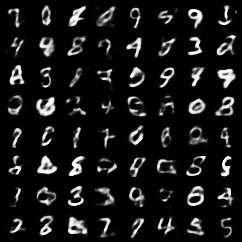

100%|██████████| 100/100 [00:01<00:00, 60.67it/s]


Epoch #17


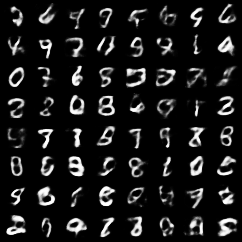

100%|██████████| 100/100 [00:01<00:00, 62.26it/s]

Epoch #18


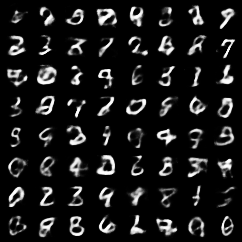

100%|██████████| 100/100 [00:01<00:00, 61.73it/s]

Epoch #19


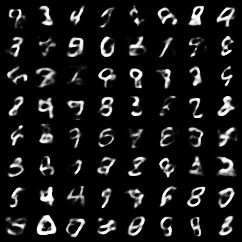

100%|██████████| 100/100 [00:01<00:00, 59.72it/s]

Epoch #20


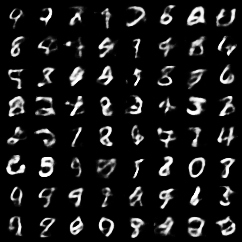

100%|██████████| 100/100 [00:01<00:00, 60.75it/s]


Epoch #21


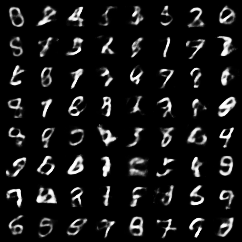

100%|██████████| 100/100 [00:01<00:00, 59.86it/s]

Epoch #22


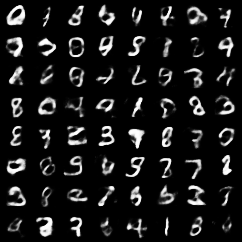

100%|██████████| 100/100 [00:01<00:00, 60.20it/s]


Epoch #23


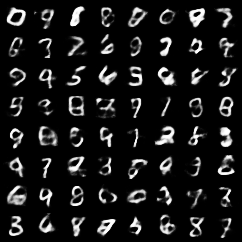

100%|██████████| 100/100 [00:01<00:00, 60.86it/s]


Epoch #24


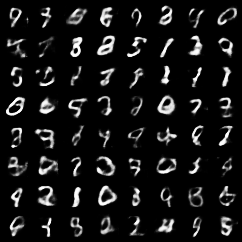

100%|██████████| 100/100 [00:01<00:00, 61.20it/s]

Epoch #25


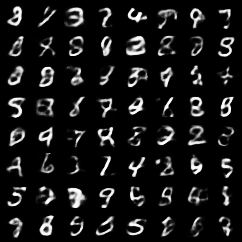

100%|██████████| 100/100 [00:01<00:00, 58.32it/s]

Epoch #26


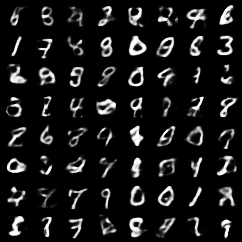

100%|██████████| 100/100 [00:01<00:00, 58.36it/s]

Epoch #27


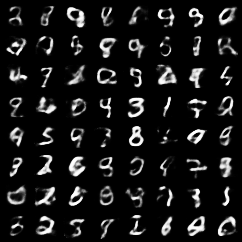

100%|██████████| 100/100 [00:01<00:00, 60.71it/s]

Epoch #28


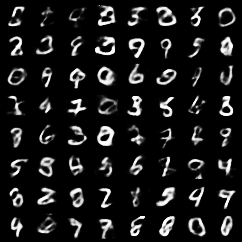

100%|██████████| 100/100 [00:01<00:00, 57.11it/s]

Epoch #29


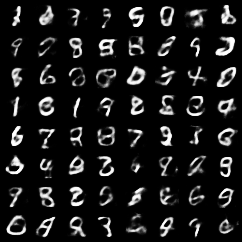

100%|██████████| 100/100 [00:01<00:00, 57.09it/s]


Epoch #30


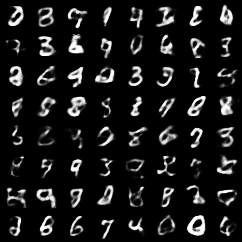

100%|██████████| 100/100 [00:01<00:00, 57.65it/s]


Epoch #31


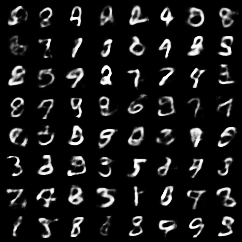

100%|██████████| 100/100 [00:01<00:00, 57.20it/s]

Epoch #32


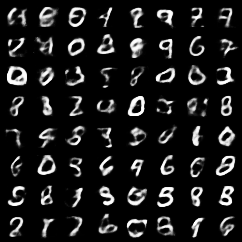

100%|██████████| 100/100 [00:01<00:00, 57.20it/s]

Epoch #33


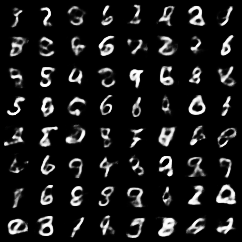

100%|██████████| 100/100 [00:01<00:00, 59.91it/s]


Epoch #34


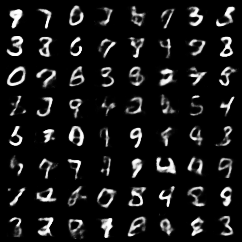

100%|██████████| 100/100 [00:01<00:00, 59.56it/s]

Epoch #35


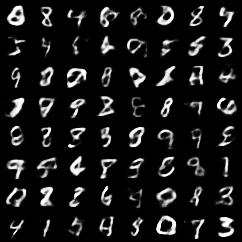

100%|██████████| 100/100 [00:01<00:00, 58.85it/s]

Epoch #36


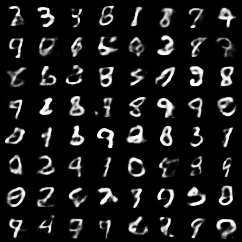

100%|██████████| 100/100 [00:01<00:00, 58.06it/s]

Epoch #37


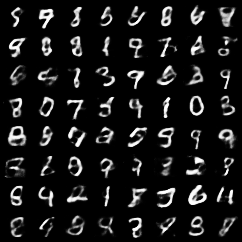

100%|██████████| 100/100 [00:01<00:00, 58.69it/s]

Epoch #38


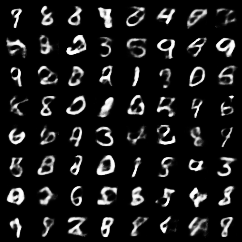

100%|██████████| 100/100 [00:01<00:00, 56.20it/s]


Epoch #39


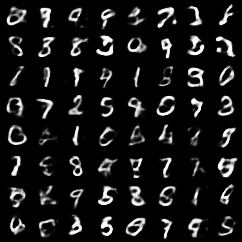

100%|██████████| 100/100 [00:01<00:00, 60.88it/s]


Epoch #40


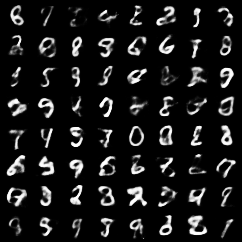

100%|██████████| 100/100 [00:01<00:00, 56.05it/s]


Epoch #41


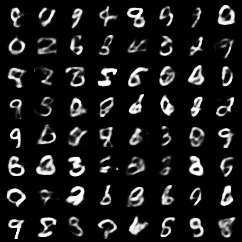

100%|██████████| 100/100 [00:01<00:00, 55.72it/s]


Epoch #42


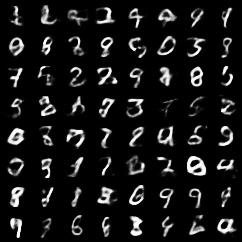

100%|██████████| 100/100 [00:01<00:00, 55.91it/s]

Epoch #43


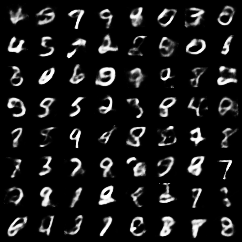

100%|██████████| 100/100 [00:01<00:00, 57.77it/s]


Epoch #44


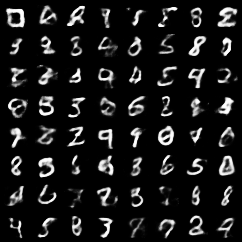

100%|██████████| 100/100 [00:01<00:00, 59.54it/s]

Epoch #45


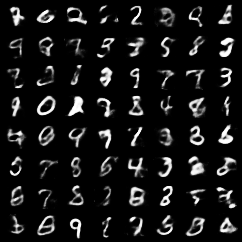

100%|██████████| 100/100 [00:01<00:00, 58.93it/s]


Epoch #46


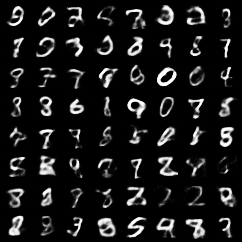

100%|██████████| 100/100 [00:01<00:00, 58.36it/s]

Epoch #47


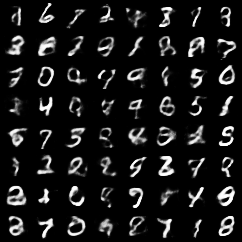

100%|██████████| 100/100 [00:01<00:00, 56.67it/s]

Epoch #48


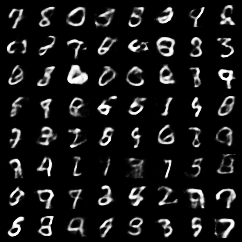

100%|██████████| 100/100 [00:01<00:00, 57.59it/s]


Epoch #49


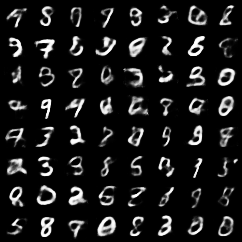

100%|██████████| 100/100 [00:01<00:00, 57.16it/s]

Epoch #50


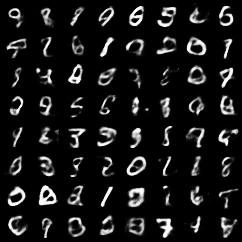

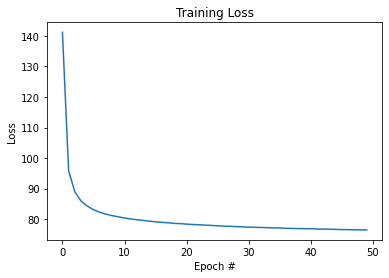

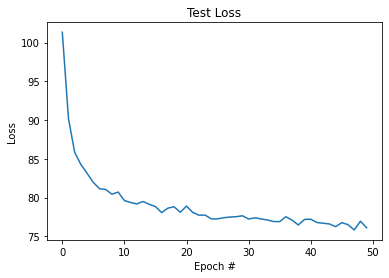

In [ ]:
class VAE(nn.Module):
    def __init__(self):
        super(VAE, self).__init__()
        #TODO
        self.enc1 = nn.Linear(in_features=784, out_features=400)
        self.enc2 = nn.Linear(in_features=400, out_features=latent_size*2)
        self.dec1 = nn.Linear(in_features=latent_size, out_features=400)
        self.dec2 = nn.Linear(in_features=400, out_features=784)

    def encode(self, x):
        #The encoder will take an input of size 784, and will produce two vectors of size latent_size (corresponding to the coordinatewise means and log_variances)
        #It should have a single hidden linear layer with 400 nodes using ReLU activations, and have two linear output layers (no activations)
        #TODO
        x = F.relu(self.enc1(x))
        x = self.enc2(x).view(-1, 2, latent_size)
        means = x[:, 0, :] 
        log_variances = x[:, 1, :] 
        return means,log_variances

    def reparameterize(self, means, log_variances):
        #The reparameterization module lies between the encoder and the decoder
        #It takes in the coordinatewise means and log-variances from the encoder (each of dimension latent_size), and returns a sample from a Gaussian with the corresponding parameters
        #TODO
        std = torch.exp(0.5*log_variances) 
        eps = torch.randn_like(std) 
        sample = means + (eps * std) 
        return sample

    def decode(self, z):
        #The decoder will take an input of size latent_size, and will produce an output of size 784
        #It should have a single hidden linear layer with 400 nodes using ReLU activations, and use Sigmoid activation for its outputs
        #TODO
        z=F.relu(self.dec1(z))
        reconstruction = torch.sigmoid(self.dec2(z))
        return reconstruction

    def forward(self, x):
        #Apply the VAE encoder, reparameterization, and decoder to an input of size 784
        #Returns an output image of size 784, as well as the means and log_variances, each of size latent_size (they will be needed when computing the loss)
        #TODO
        means,log_variances=self.encode(x)
        z = self.reparameterize(means, log_variances)
        reconstruction = self.decode(z)
        return reconstruction, means, log_variances

def vae_loss_function(bce_loss,means,log_variances):
    #Compute the VAE loss
    #The loss is a sum of two terms: reconstruction error and KL divergence
    #Use cross entropy loss between x and reconstructed_x for the reconstruction error (as opposed to L2 loss as discussed in lecture -- this is sometimes done for data in [0,1] for easier optimization)
    #The KL divergence is -1/2 * sum(1 + log_variances - means^2 - exp(log_variances)) as described in lecture
    #Returns loss (reconstruction + KL divergence) and reconstruction loss only (both scalars)
    #TODO
    recon_loss = bce_loss 
    kl_loss = -0.5 * torch.sum(1 + log_variances - means.pow(2) - log_variances.exp())
    loss=recon_loss+kl_loss
    return loss

def train(model, dataloader):
    #Trains the VAE for one epoch on the training dataset
    #Returns the average (over the dataset) loss (reconstruction + KL divergence) and reconstruction loss only (both scalars)
    #TODO
    avg_train_loss = 0
    avg_train_reconstruction_loss = 0
    model.train()
    for i, data in tqdm(enumerate(dataloader), total=int(len(train_data)/dataloader.batch_size)):
        data, _ = data
        data = data.to(device)
        data = data.view(data.size(0), -1)
        optimizer.zero_grad()
        reconstruction, mu, logvar = model(data)
        bce_loss = criterion(reconstruction, data)
        loss = vae_loss_function(bce_loss, mu, logvar)
        avg_train_loss += loss.item()
        avg_train_reconstruction_loss += bce_loss.item()
        loss.backward()
        optimizer.step()
    avg_train_loss = avg_train_loss/len(dataloader.dataset)
    avg_train_reconstruction_loss = avg_train_reconstruction_loss/len(dataloader.dataset)
    return avg_train_loss, avg_train_reconstruction_loss

def test(model,dataloader):
    #Runs the VAE on the test dataset
    #Returns the average (over the dataset) loss (reconstruction + KL divergence) and reconstruction loss only (both scalars)
    #TODO
    avg_test_loss = 0
    avg_test_reconstruction_loss = 0
    model.eval()
    with torch.no_grad():
        for i, data in tqdm(enumerate(dataloader), total=int(len(test_data)/dataloader.batch_size)):
            data, _ = data
            data = data.to(device)
            data = data.view(data.size(0), -1)
            reconstruction, mu, logvar = model(data)
            bce_loss = criterion(reconstruction, data)
            loss = vae_loss_function(bce_loss, mu, logvar)
            avg_test_loss += loss.item()
            avg_test_reconstruction_loss += bce_loss.item()
    avg_test_loss = avg_test_loss/len(dataloader.dataset)
    avg_test_reconstruction_loss = avg_test_reconstruction_loss/len(dataloader.dataset)
    return avg_test_loss, avg_test_reconstruction_loss

epochs = 50
avg_train_losses = []
avg_train_reconstruction_losses = []
avg_test_losses = []
avg_test_reconstruction_losses = []

model = VAE().to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.BCELoss(reduction='sum')

for epoch in range(1, epochs + 1):
    avg_train_loss, avg_train_reconstruction_loss = train(model, train_loader)
    avg_test_loss, avg_test_reconstruction_loss = test(model, test_loader)
    
    avg_train_losses.append(avg_train_loss)
    avg_train_reconstruction_losses.append(avg_train_reconstruction_loss)
    avg_test_losses.append(avg_test_loss)
    avg_test_reconstruction_losses.append(avg_test_reconstruction_loss)

    with torch.no_grad():
        sample = torch.randn(64, latent_size).to(device)
        sample = model.decode(sample).cpu()
        save_image(sample.view(64, 1, 28, 28),
                   'results/sample_' + str(epoch) + '.png')
        print('Epoch #' + str(epoch))
        display(Image('results/sample_' + str(epoch) + '.png'))
        print('\n')

plt.plot(avg_train_reconstruction_losses)
plt.title('Training Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch #')
plt.show()

plt.plot(avg_test_reconstruction_losses)
plt.title('Test Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch #')
plt.show()


In [ ]:
#############################Exercise 2b#######################################
from __future__ import print_function
import argparse
import torch
import torch.utils.data
from torch import nn, optim
from torchvision import datasets, transforms
from torchvision.utils import save_image
from IPython.display import Image, display
import matplotlib.pyplot as plt
import os
import numpy as np
from tqdm import tqdm

if not os.path.exists('results'):
    os.mkdir('results')

batch_size = 100
latent_size = 20

cuda = torch.cuda.is_available()
device = torch.device("cuda" if cuda else "cpu")

kwargs = {'num_workers': 1, 'pin_memory': True} if cuda else {}
train_data = datasets.MNIST('../data', train=True, download=True,
                   transform=transforms.ToTensor())
test_data = datasets.MNIST('../data', train=False, transform=transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(
    train_data,
    batch_size=batch_size, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(
    test_data,
    batch_size=batch_size, shuffle=True, **kwargs)

100%|██████████| 100/100 [00:01<00:00, 54.59it/s]


Epoch #1


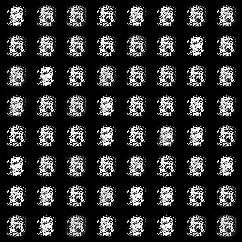

100%|██████████| 100/100 [00:01<00:00, 55.42it/s]


Epoch #2


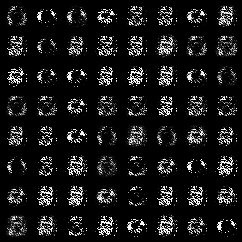

100%|██████████| 100/100 [00:01<00:00, 54.90it/s]


Epoch #3


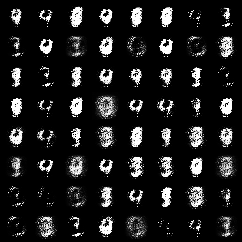

100%|██████████| 100/100 [00:01<00:00, 53.67it/s]


Epoch #4


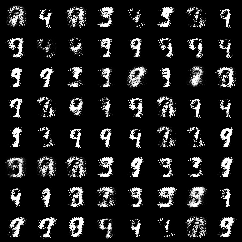

100%|██████████| 100/100 [00:01<00:00, 54.64it/s]

Epoch #5


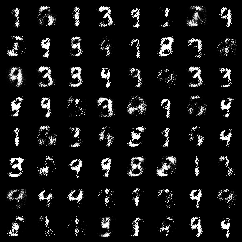

100%|██████████| 100/100 [00:01<00:00, 53.59it/s]


Epoch #6


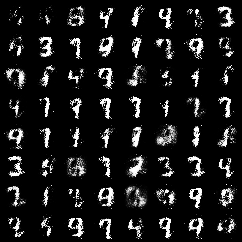

100%|██████████| 100/100 [00:01<00:00, 54.16it/s]


Epoch #7


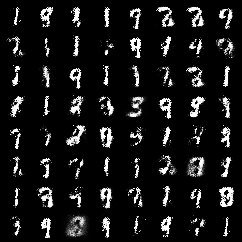

100%|██████████| 100/100 [00:01<00:00, 54.28it/s]


Epoch #8


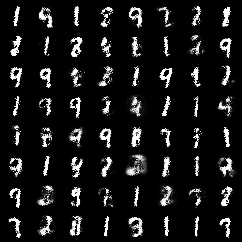

100%|██████████| 100/100 [00:01<00:00, 55.96it/s]

Epoch #9


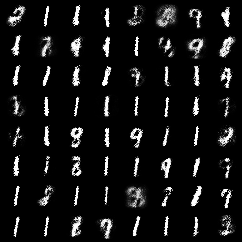

100%|██████████| 100/100 [00:01<00:00, 53.28it/s]


Epoch #10


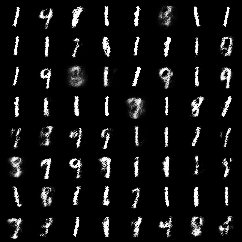

100%|██████████| 100/100 [00:01<00:00, 54.23it/s]


Epoch #11


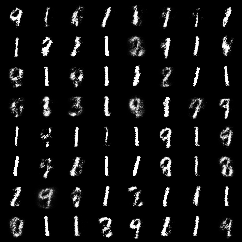

100%|██████████| 100/100 [00:01<00:00, 53.82it/s]


Epoch #12


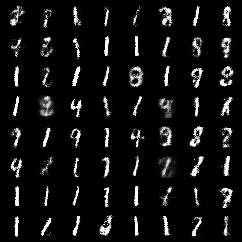

100%|██████████| 100/100 [00:01<00:00, 55.15it/s]


Epoch #13


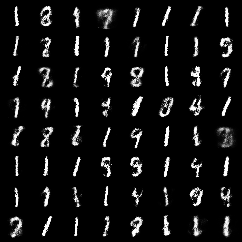

100%|██████████| 100/100 [00:01<00:00, 53.01it/s]


Epoch #14


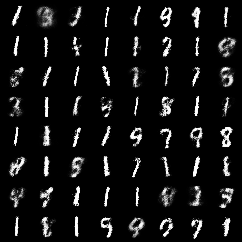

100%|██████████| 100/100 [00:01<00:00, 54.22it/s]

Epoch #15


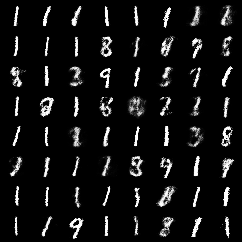

100%|██████████| 100/100 [00:01<00:00, 52.31it/s]

Epoch #16


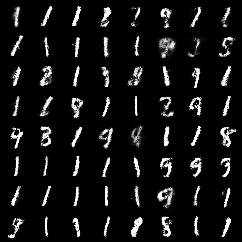

100%|██████████| 100/100 [00:02<00:00, 38.43it/s]


Epoch #17


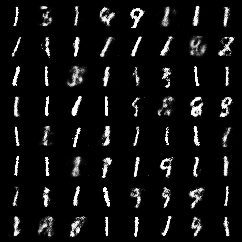

100%|██████████| 100/100 [00:01<00:00, 51.44it/s]

Epoch #18


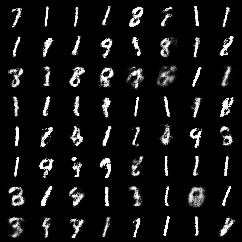

100%|██████████| 100/100 [00:01<00:00, 52.09it/s]

Epoch #19


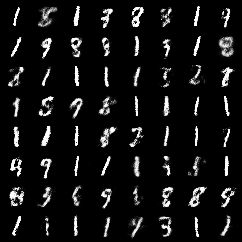

100%|██████████| 100/100 [00:01<00:00, 53.31it/s]

Epoch #20


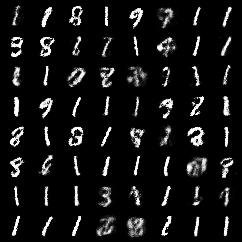

100%|██████████| 100/100 [00:01<00:00, 52.93it/s]

Epoch #21


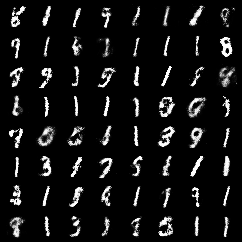

100%|██████████| 100/100 [00:01<00:00, 51.79it/s]

Epoch #22


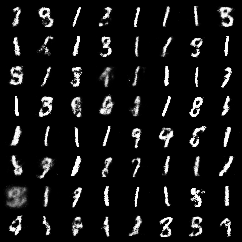

100%|██████████| 100/100 [00:01<00:00, 51.49it/s]

Epoch #23


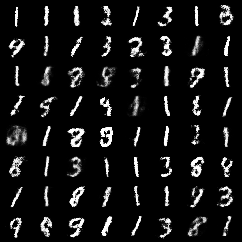

100%|██████████| 100/100 [00:01<00:00, 51.87it/s]

Epoch #24


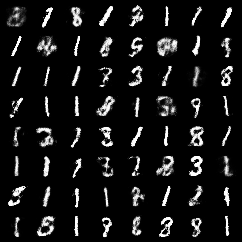

100%|██████████| 100/100 [00:01<00:00, 51.62it/s]


Epoch #25


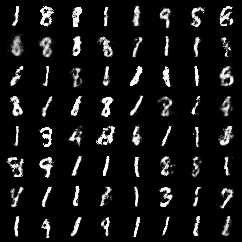

100%|██████████| 100/100 [00:01<00:00, 54.34it/s]


Epoch #26


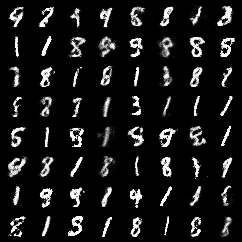

100%|██████████| 100/100 [00:01<00:00, 52.42it/s]


Epoch #27


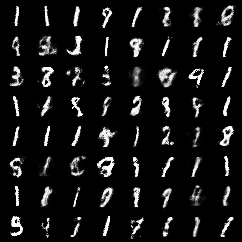

100%|██████████| 100/100 [00:01<00:00, 52.88it/s]

Epoch #28


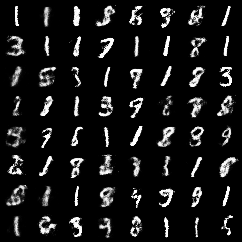

100%|██████████| 100/100 [00:02<00:00, 49.33it/s]


Epoch #29


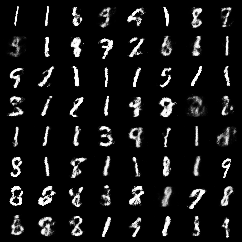

100%|██████████| 100/100 [00:01<00:00, 51.13it/s]

Epoch #30


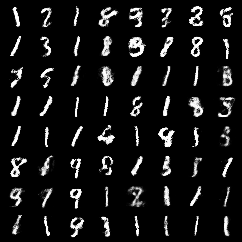

100%|██████████| 100/100 [00:02<00:00, 49.51it/s]


Epoch #31


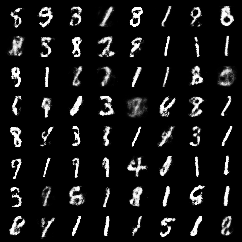

100%|██████████| 100/100 [00:01<00:00, 51.55it/s]

Epoch #32


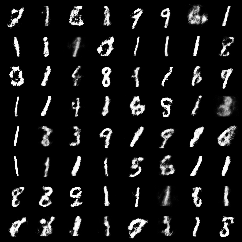

100%|██████████| 100/100 [00:01<00:00, 51.62it/s]

Epoch #33


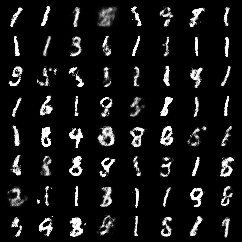

100%|██████████| 100/100 [00:02<00:00, 49.77it/s]


Epoch #34


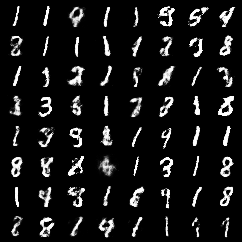

100%|██████████| 100/100 [00:01<00:00, 50.54it/s]

Epoch #35


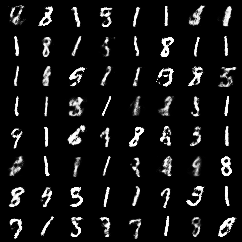

100%|██████████| 100/100 [00:01<00:00, 51.03it/s]

Epoch #36


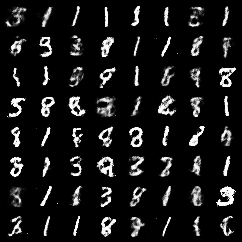

100%|██████████| 100/100 [00:02<00:00, 49.44it/s]

Epoch #37


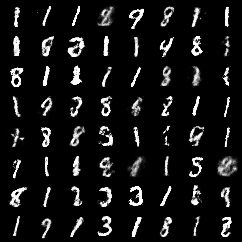

100%|██████████| 100/100 [00:02<00:00, 47.88it/s]

Epoch #38


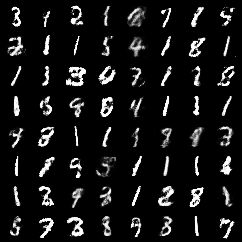

100%|██████████| 100/100 [00:02<00:00, 48.89it/s]


Epoch #39


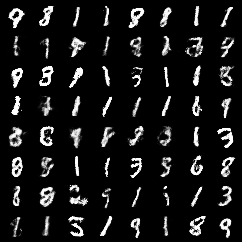

100%|██████████| 100/100 [00:02<00:00, 47.02it/s]

Epoch #40


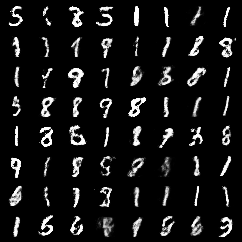

100%|██████████| 100/100 [00:02<00:00, 46.60it/s]

Epoch #41


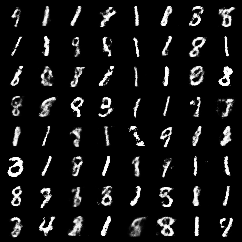

100%|██████████| 100/100 [00:02<00:00, 47.86it/s]

Epoch #42


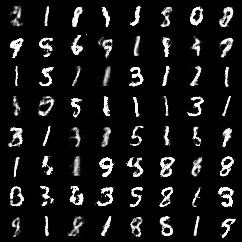

100%|██████████| 100/100 [00:02<00:00, 45.95it/s]

Epoch #43


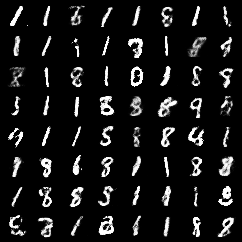

100%|██████████| 100/100 [00:02<00:00, 46.97it/s]

Epoch #44


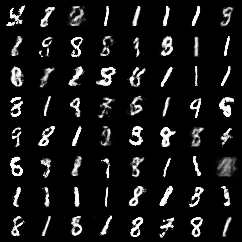

100%|██████████| 100/100 [00:02<00:00, 45.92it/s]

Epoch #45


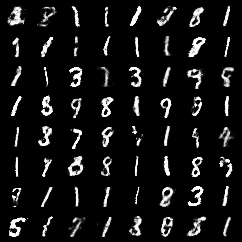

100%|██████████| 100/100 [00:02<00:00, 44.99it/s]

Epoch #46


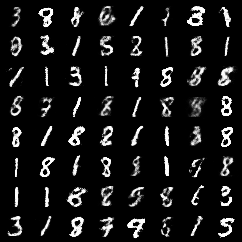

100%|██████████| 100/100 [00:02<00:00, 45.10it/s]

Epoch #47


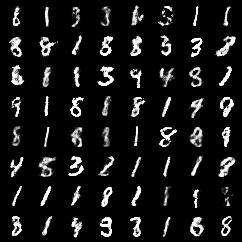

100%|██████████| 100/100 [00:02<00:00, 46.15it/s]

Epoch #48


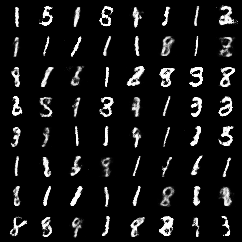

100%|██████████| 100/100 [00:02<00:00, 46.80it/s]

Epoch #49


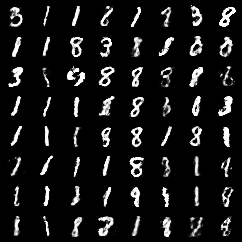

100%|██████████| 100/100 [00:02<00:00, 46.42it/s]

Epoch #50


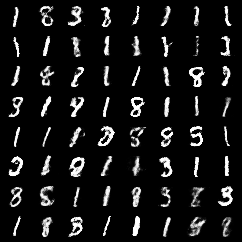



[0.10990952809651693, 0.033765430450439456, 0.03537472407023112, 0.05172741254170736, 0.06718063990275065, 0.07320191065470377, 0.12282178243001302, 0.17234654744466146, 0.21567624409993488, 0.2698400115966797, 0.31197980244954426, 0.35351119995117186, 0.39996665954589844, 0.4072340901692708, 0.4395580037434896, 0.46134541829427084, 0.47782302856445313, 0.48704050699869794, 0.4896400451660156, 0.5085828145345052, 0.5215701293945313, 0.5379849243164062, 0.5458590189615885, 0.5509157307942708, 0.5610317993164062, 0.5524808247884114, 0.5555007934570313, 0.5588861083984376, 0.5523726908365886, 0.5631739298502604, 0.5643086751302083, 0.5671015930175781, 0.5672804260253906, 0.5648169962565104, 0.5678184509277344, 0.5691057840983073, 0.5671238199869791, 0.5663677469889323, 0.5635027567545573, 0.5519637044270833, 0.552626698811849, 0.5488342793782552, 0.5449454243977865, 0.5410932922363281, 0.5336780802408854, 0.5295614624023437, 0.5275392659505208, 0.5248983764648437, 0.5238945007324218, 0.

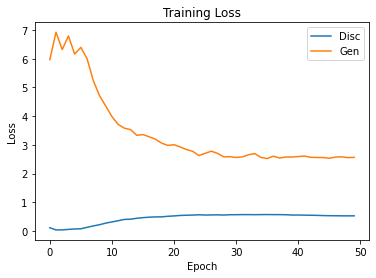

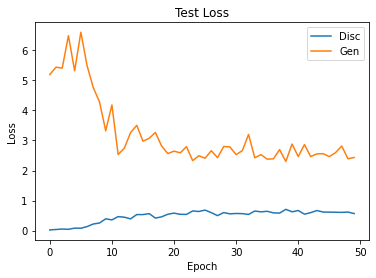

In [ ]:
class Generator(nn.Module):
    #The generator takes an input of size latent_size, and will produce an output of size 784.
    #It should have a single hidden linear layer with 400 nodes using ReLU activations, and use Sigmoid activation for its outputs
    def __init__(self):
        super(Generator, self).__init__()
        #TODO
        self.main = nn.Sequential(
        nn.Linear(latent_size, 400),
        nn.ReLU(),
        nn.Linear(400, 784),
        nn.Sigmoid(),)
    def forward(self, z):
        #TODO
        return self.main(z)#.view(-1, 1, 28, 28)

class Discriminator(nn.Module):
    #The discriminator takes an input of size 784, and will produce an output of size 1.
    #It should have a single hidden linear layer with 400 nodes using ReLU activations, and use Sigmoid activation for its output
    def __init__(self):
        super(Discriminator, self).__init__()
        #TODO
        self.main = nn.Sequential(
        nn.Linear(784, 400),
        nn.ReLU(),
        nn.Linear(400, 1),
        nn.Sigmoid(),)

    def forward(self, x):
        #TODO
        x = x.view(-1, 784)
        return self.main(x)

def train(generator, generator_optimizer, discriminator, discriminator_optimizer):
    #Trains both the generator and discriminator for one epoch on the training dataset.
    #Returns the average generator and discriminator loss (scalar values, use the binary cross-entropy appropriately)
    #TODO
    avg_generator_loss = 0
    avg_discriminator_loss = 0
    gloss = 0.0
    dloss = 0.0
    l = nn.BCELoss()
    count = 0
    for bi,data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        count += 1
        image,_ = data
        data_real = image.to(device)
        data_fake = generator(torch.randn(batch_size, latent_size).to(device)).detach()
        real_label = torch.ones(batch_size, 1).to(device)
        fake_label = torch.zeros(batch_size, 1).to(device)
        discriminator_optimizer.zero_grad()
        loss_real = l(discriminator(data_real), real_label)
        loss_fake = l(discriminator(data_fake), fake_label)
        loss_real.backward()
        loss_fake.backward()
        discriminator_optimizer.step()
        dloss += loss_real+loss_fake
        data_fake = generator(torch.randn(batch_size, latent_size).to(device))
        generator_optimizer.zero_grad()
        loss = l(discriminator(data_fake), real_label)
        loss.backward()
        generator_optimizer.step()
        gloss += loss
    avg_generator_loss = gloss.item()/count
    avg_discriminator_loss = dloss.item()/count
    return avg_generator_loss, avg_discriminator_loss

def test(generator, discriminator):
    #Runs both the generator and discriminator over the test dataset.
    #Returns the average generator and discriminator loss (scalar values, use the binary cross-entropy appropriately)
    #TODO
    avg_generator_loss = 0
    avg_discriminator_loss = 0
    gloss = 0.0
    dloss = 0.0
    l = nn.BCELoss()
    count = 0
    for bi,data in tqdm(enumerate(test_loader), total=int(len(test_data)/test_loader.batch_size)):
        count += 1
        image,_ = data
        data_real = image.to(device)
        data_fake = generator(torch.randn(batch_size, latent_size).to(device)).detach()
        real_label = torch.ones(batch_size, 1).to(device)
        fake_label = torch.zeros(batch_size, 1).to(device)
        loss_real = l(discriminator(data_real), real_label)
        loss_fake = l(discriminator(data_fake), fake_label)
        dloss += loss_real+loss_fake
        data_fake = generator(torch.randn(batch_size, latent_size).to(device))
        loss = l(discriminator(data_fake), real_label)
        gloss += loss
    avg_generator_loss = gloss.item()/count
    avg_discriminator_loss = dloss.item()/count
    return avg_generator_loss, avg_discriminator_loss


epochs = 50

discriminator_avg_train_losses = []
discriminator_avg_test_losses = []
generator_avg_train_losses = []
generator_avg_test_losses = []

generator = Generator().to(device)
discriminator = Discriminator().to(device)

generator_optimizer = optim.Adam(generator.parameters(), lr=1e-3)
discriminator_optimizer = optim.Adam(discriminator.parameters(), lr=1e-3)

for epoch in range(1, epochs + 1):
    generator_avg_train_loss, discriminator_avg_train_loss = train(generator, generator_optimizer, discriminator, discriminator_optimizer)
    generator_avg_test_loss, discriminator_avg_test_loss = test(generator, discriminator)

    discriminator_avg_train_losses.append(discriminator_avg_train_loss)
    generator_avg_train_losses.append(generator_avg_train_loss)
    discriminator_avg_test_losses.append(discriminator_avg_test_loss)
    generator_avg_test_losses.append(generator_avg_test_loss)

    with torch.no_grad():
        sample = torch.randn(64, latent_size).to(device)
        sample = generator(sample).cpu()
        save_image(sample.view(64, 1, 28, 28),
                   'results/sample_' + str(epoch) + '.png')
        print('Epoch #' + str(epoch))
        display(Image('results/sample_' + str(epoch) + '.png'))
        print('\n')
        
plt.plot(discriminator_avg_train_losses)
plt.plot(generator_avg_train_losses)
plt.title('Training Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Disc','Gen'], loc='upper right')
plt.show()

plt.plot(discriminator_avg_test_losses)
plt.plot(generator_avg_test_losses)
plt.title('Test Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Disc','Gen'], loc='upper right')
plt.show()